# PROBLEM STATEMENT.

#Problem Statement :

Customers send back a substantial part of the products that they purchase online. Return shipping is expensive for online platforms and return orders are said to reach 50% for certain industries and products. Nevertheless, free or inexpensive return shipping has become a customer expectation and de-facto standard in the fierce online competition on clothing, but shops have indirect ways to influence customer purchase behavior. For purchases where return seems likely, a shop could, for example, restrict payment options or display additional marketing communication.

#### Predicting Likelyness of the Customer to return the product

In [101]:
# DataFrame Libraries
import pandas as pd
import numpy as np

#DataVisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Data Transformation libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score,KFold

#Math Libraries
import scipy.stats as sci

#Metrices Libraries
from sklearn.metrics import accuracy_score,mean_squared_error

#Machine Learning Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

#Date and time Libraries
from datetime import datetime

#### Importing the Libraries

In [2]:
df_training_set = pd.read_csv('TrainingData_V1.csv')

In [3]:
df_training_set1 = df_training_set.copy()

In [4]:
df_training_set1.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,17-04-1969,1013,23-06-2016,0
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,22-04-1970,1001,15-03-2015,1
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,22-04-1970,1001,15-03-2015,0
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,09-01-1960,1013,17-02-2015,0
4,43,23-06-2016,26-06-2016,394,40,black,44,90.0,30827,Mrs,NaN,1006,09-02-2016,1


In [5]:
df_training_set1.dtypes

order_item_id      int64
order_date        object
delivery_date     object
item_id            int64
item_size         object
item_color        object
brand_id           int64
item_price       float64
user_id            int64
user_title        object
user_dob          object
user_state         int64
user_reg_date     object
return             int64
dtype: object

#### Feature Engineering of Date and Time Columns

In [6]:
df_training_set1['order_date'] = pd.to_datetime(df_training_set1['order_date'],format='%d-%m-%Y')

In [7]:
df_training_set1['delivery_date'] = pd.to_datetime(df_training_set1['delivery_date'],format='%d-%m-%Y')

In [8]:
df_training_set1['user_dob'] = pd.to_datetime(df_training_set1['user_dob'],format='%d-%m-%Y')

In [9]:
df_training_set1['user_reg_date'] = pd.to_datetime(df_training_set1['user_reg_date'],format='%d-%m-%Y')

#### Understanding more about the dataset

In [10]:
df_training_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_item_id  79945 non-null  int64         
 1   order_date     79945 non-null  datetime64[ns]
 2   delivery_date  72509 non-null  datetime64[ns]
 3   item_id        79945 non-null  int64         
 4   item_size      79945 non-null  object        
 5   item_color     79945 non-null  object        
 6   brand_id       79945 non-null  int64         
 7   item_price     79945 non-null  float64       
 8   user_id        79945 non-null  int64         
 9   user_title     79945 non-null  object        
 10  user_dob       72956 non-null  datetime64[ns]
 11  user_state     79945 non-null  int64         
 12  user_reg_date  79945 non-null  datetime64[ns]
 13  return         79945 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(6), object(3)
memory usage: 8.

In [11]:
df_training_set1.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.9,30822,Mrs,1969-04-17,1013,2016-06-23,0
1,10,2016-06-22,2016-06-27,195,xxl,grey,46,19.9,30823,Mrs,1970-04-22,1001,2015-03-15,1
2,11,2016-06-22,2016-07-05,25,xxl,grey,5,79.9,30823,Mrs,1970-04-22,1001,2015-03-15,0
3,32,2016-06-23,2016-06-26,173,m,brown,20,19.9,17234,Mrs,1960-01-09,1013,2015-02-17,0
4,43,2016-06-23,2016-06-26,394,40,black,44,90.0,30827,Mrs,NaT,1006,2016-02-09,1


#### Feature Engineering of Date and Time Columns

In [12]:
df_training_set1['order_year'] = df_training_set1['order_date'].dt.year
df_training_set1['order_month'] = df_training_set1['order_date'].dt.month
df_training_set1['order_day'] = df_training_set1['order_date'].dt.day
df_training_set1['delivery_year'] = df_training_set1['delivery_date'].dt.year
df_training_set1['delivery_month'] = df_training_set1['delivery_date'].dt.month
df_training_set1['delivery_day'] = df_training_set1['delivery_date'].dt.day
df_training_set1['user_year'] = df_training_set1['user_dob'].dt.year
df_training_set1['user_month'] =df_training_set1['user_dob'].dt.month
df_training_set1['user_day'] = df_training_set1['user_dob'].dt.day
df_training_set1['reg_year'] = df_training_set1['user_reg_date'].dt.year
df_training_set1['reg_month'] = df_training_set1['user_reg_date'].dt.month
df_training_set1['reg_day']=df_training_set1['user_reg_date'].dt.day

In [13]:
df_training_set1.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,...,order_day,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.9,30822,Mrs,...,22,2016.0,6.0,27.0,1969.0,4.0,17.0,2016,6,23
1,10,2016-06-22,2016-06-27,195,xxl,grey,46,19.9,30823,Mrs,...,22,2016.0,6.0,27.0,1970.0,4.0,22.0,2015,3,15
2,11,2016-06-22,2016-07-05,25,xxl,grey,5,79.9,30823,Mrs,...,22,2016.0,7.0,5.0,1970.0,4.0,22.0,2015,3,15
3,32,2016-06-23,2016-06-26,173,m,brown,20,19.9,17234,Mrs,...,23,2016.0,6.0,26.0,1960.0,1.0,9.0,2015,2,17
4,43,2016-06-23,2016-06-26,394,40,black,44,90.0,30827,Mrs,...,23,2016.0,6.0,26.0,NaN,NaN,NaN,2016,2,9


In [14]:
df_training_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_item_id   79945 non-null  int64         
 1   order_date      79945 non-null  datetime64[ns]
 2   delivery_date   72509 non-null  datetime64[ns]
 3   item_id         79945 non-null  int64         
 4   item_size       79945 non-null  object        
 5   item_color      79945 non-null  object        
 6   brand_id        79945 non-null  int64         
 7   item_price      79945 non-null  float64       
 8   user_id         79945 non-null  int64         
 9   user_title      79945 non-null  object        
 10  user_dob        72956 non-null  datetime64[ns]
 11  user_state      79945 non-null  int64         
 12  user_reg_date   79945 non-null  datetime64[ns]
 13  return          79945 non-null  int64         
 14  order_year      79945 non-null  int64         
 15  or

<AxesSubplot:>

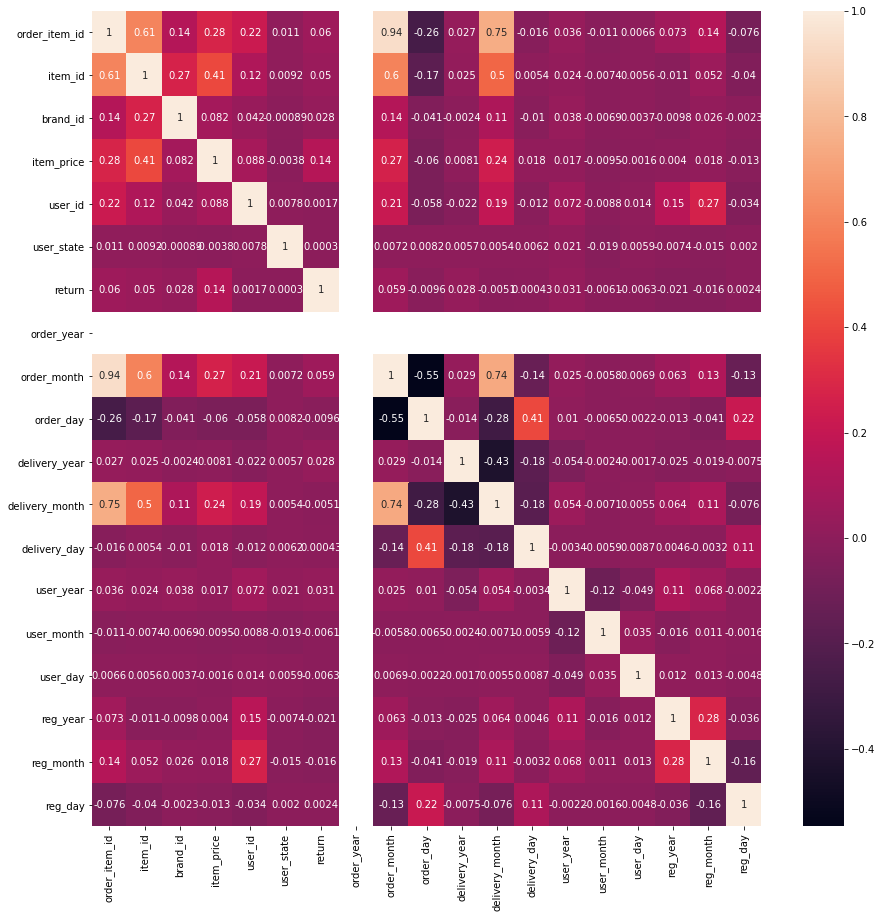

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df_training_set1.corr(),annot=True)

In [16]:
df_training_set1.groupby('order_year').size()

order_year
2016    79945
dtype: int64

In [17]:
df_training_set1.groupby('order_month').size()

order_month
6    16598
7    20830
8    33618
9     8899
dtype: int64

In [18]:
df_training_set1.groupby('order_day').size()

order_day
1     3090
2     3620
3     3905
4     3874
5     3659
6     3076
7     2910
8     2265
9     2382
10    2395
11    2455
12    2229
13    2198
14    1545
15    1440
16     990
17    1231
18     793
19    1020
20    1844
21    1569
22    1578
23    2292
24    2098
25    2227
26    2984
27    6347
28    4287
29    4825
30    3542
31    1275
dtype: int64

#### Dropping all the repeated Columns

In [19]:
df_training_set1.drop('order_date',axis=1,inplace=True)

In [20]:
df_training_set1.drop('delivery_date',axis=1,inplace=True)

In [21]:
df_training_set1.drop('user_dob',axis=1,inplace=True)

In [22]:
df_training_set1.drop('user_reg_date',axis=1,inplace=True)

In [23]:
df_training_set1.drop('order_year',axis=1,inplace=True)

#### Analysing and Treatment of Missing Values

In [24]:
df_training_set1.head()

,order_item_id,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,return,...,order_day,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day
0,1,643,38,navy,30,49.9,30822,Mrs,1013,0,...,22,2016.0,6.0,27.0,1969.0,4.0,17.0,2016,6,23
1,10,195,xxl,grey,46,19.9,30823,Mrs,1001,1,...,22,2016.0,6.0,27.0,1970.0,4.0,22.0,2015,3,15
2,11,25,xxl,grey,5,79.9,30823,Mrs,1001,0,...,22,2016.0,7.0,5.0,1970.0,4.0,22.0,2015,3,15
3,32,173,m,brown,20,19.9,17234,Mrs,1013,0,...,23,2016.0,6.0,26.0,1960.0,1.0,9.0,2015,2,17
4,43,394,40,black,44,90.0,30827,Mrs,1006,1,...,23,2016.0,6.0,26.0,NaN,NaN,NaN,2016,2,9


In [25]:
df_training_set1.isnull()

,order_item_id,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,return,...,order_day,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79940,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79941,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
79942,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79943,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False


In [26]:
df_training_set1.isnull().sum()/(len(df_training_set1))*100

order_item_id     0.000000
item_id           0.000000
item_size         0.000000
item_color        0.000000
brand_id          0.000000
item_price        0.000000
user_id           0.000000
user_title        0.000000
user_state        0.000000
return            0.000000
order_month       0.000000
order_day         0.000000
delivery_year     9.301395
delivery_month    9.301395
delivery_day      9.301395
user_year         8.742260
user_month        8.742260
user_day          8.742260
reg_year          0.000000
reg_month         0.000000
reg_day           0.000000
dtype: float64

<AxesSubplot:>

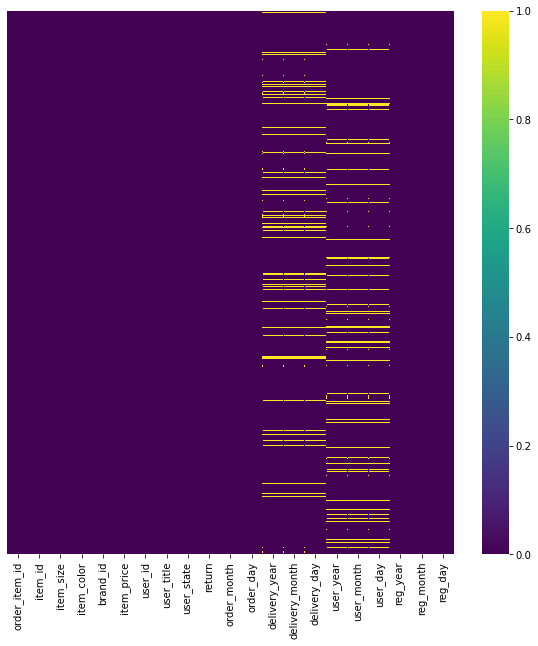

In [27]:
# Finding the Missing values
plt.figure(figsize=(10,10))
sns.heatmap(df_training_set1.isnull(),yticklabels=False,cmap='viridis')

In [28]:
#Replacing all the missing values by median:
df_training_set1['delivery_year'] = df_training_set1['delivery_year'].fillna(df_training_set1['delivery_year'].median())
df_training_set1['delivery_month'] = df_training_set1['delivery_month'].fillna(df_training_set1['delivery_month'].median())
df_training_set1['delivery_day'] = df_training_set1['delivery_day'].fillna(df_training_set1['delivery_day'].median())
df_training_set1['user_year']= df_training_set1['user_year'].fillna(df_training_set1['user_year'].median())
df_training_set1['user_month']= df_training_set1['user_month'].fillna(df_training_set1['user_month'].median())
df_training_set1['user_day']= df_training_set1['user_day'].fillna(df_training_set1['user_day'].median())

<AxesSubplot:>

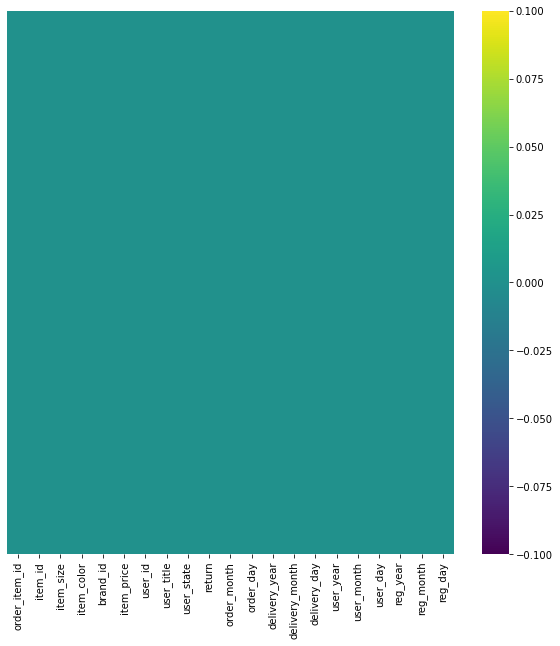

In [29]:
# Finding the Missing values
plt.figure(figsize=(10,10))
sns.heatmap(df_training_set1.isnull(),yticklabels=False,cmap='viridis')

In [30]:
df_training_set1 = df_training_set1[['order_item_id','item_id','item_size','item_color','brand_id','item_price','user_id','user_title','user_state','order_month','order_day','delivery_year','delivery_month','delivery_day','user_year','user_month','user_day','reg_year','reg_month','reg_day','return']]

In [31]:
df_training_set1.isnull().sum()/(len(df_training_set1))*100

order_item_id     0.0
item_id           0.0
item_size         0.0
item_color        0.0
brand_id          0.0
item_price        0.0
user_id           0.0
user_title        0.0
user_state        0.0
order_month       0.0
order_day         0.0
delivery_year     0.0
delivery_month    0.0
delivery_day      0.0
user_year         0.0
user_month        0.0
user_day          0.0
reg_year          0.0
reg_month         0.0
reg_day           0.0
return            0.0
dtype: float64

In [32]:
df_training_set1 = pd.DataFrame(df_training_set1)

In [33]:
df_training_set1.head()

,order_item_id,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,order_month,...,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day,return
0,1,643,38,navy,30,49.9,30822,Mrs,1013,6,...,2016.0,6.0,27.0,1969.0,4.0,17.0,2016,6,23,0
1,10,195,xxl,grey,46,19.9,30823,Mrs,1001,6,...,2016.0,6.0,27.0,1970.0,4.0,22.0,2015,3,15,1
2,11,25,xxl,grey,5,79.9,30823,Mrs,1001,6,...,2016.0,7.0,5.0,1970.0,4.0,22.0,2015,3,15,0
3,32,173,m,brown,20,19.9,17234,Mrs,1013,6,...,2016.0,6.0,26.0,1960.0,1.0,9.0,2015,2,17,0
4,43,394,40,black,44,90.0,30827,Mrs,1006,6,...,2016.0,6.0,26.0,1965.0,7.0,16.0,2016,2,9,1


#### Label Encoding all the categorical Features

In [34]:
df_training_set1.drop('item_size',axis=1,inplace=True)

In [35]:
LaEn = LabelEncoder()

In [36]:
df_training_set1['item_color'] = LaEn.fit_transform(df_training_set1['item_color'])
df_training_set1['user_title'] = LaEn.fit_transform(df_training_set1['user_title'])

In [37]:
df_training_set1.head()

,order_item_id,item_id,item_color,brand_id,item_price,user_id,user_title,user_state,order_month,order_day,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day,return
0,1,643,60,30,49.9,30822,3,1013,6,22,2016.0,6.0,27.0,1969.0,4.0,17.0,2016,6,23,0
1,10,195,47,46,19.9,30823,3,1001,6,22,2016.0,6.0,27.0,1970.0,4.0,22.0,2015,3,15,1
2,11,25,47,5,79.9,30823,3,1001,6,22,2016.0,7.0,5.0,1970.0,4.0,22.0,2015,3,15,0
3,32,173,22,20,19.9,17234,3,1013,6,23,2016.0,6.0,26.0,1960.0,1.0,9.0,2015,2,17,0
4,43,394,18,44,90.0,30827,3,1006,6,23,2016.0,6.0,26.0,1965.0,7.0,16.0,2016,2,9,1


<AxesSubplot:>

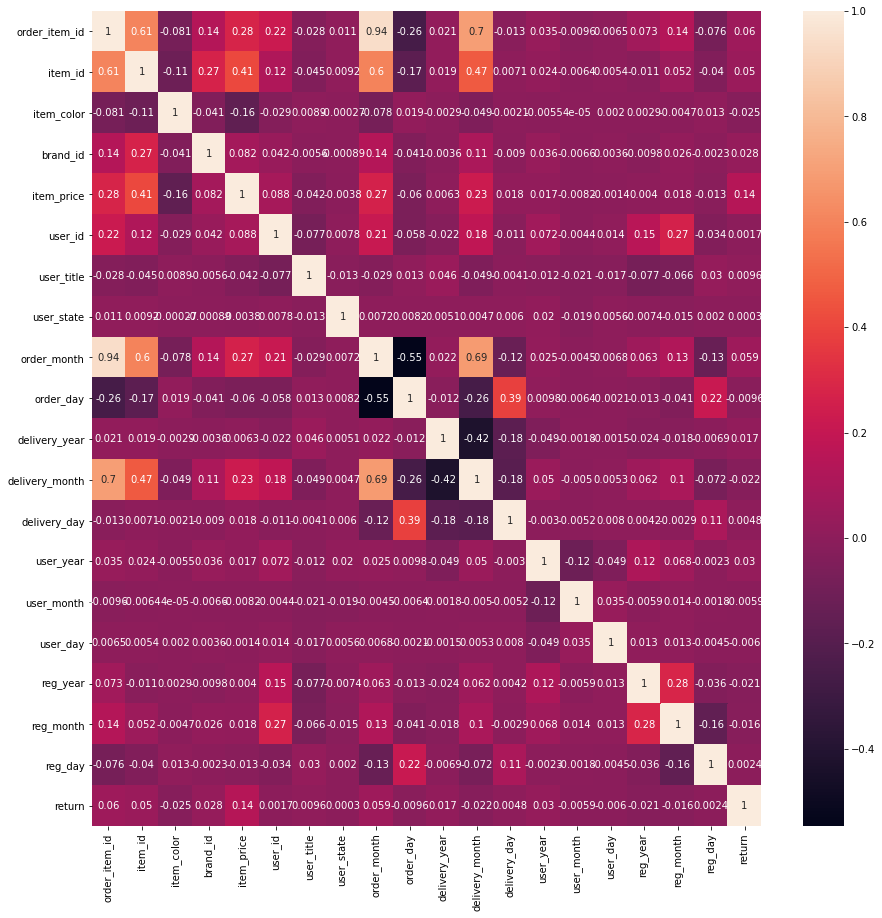

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(df_training_set1.corr(),annot=True)

#### Creating a EDA Report

In [39]:
def describe(my_df):
    
    #creating an empty list for columns and appending everything into that
    cols=[]
    for i in my_df.columns:
        if my_df[i].dtype != object:
            cols.append(i)
    
    
    #Now we are describing which needs to be set as columns and what needs to be set as index in Dataframe
    result = pd.DataFrame(columns= cols,index= ['DataType','Count','Min', 'Q1', 'Q2', 'Mean', 'Q3', 'Max', 'Std','Skew','Kurt','Range','IQR','Skewness comment','Outlier comment','Kurtosis comment'])
    
    for i in result.columns:
        result.loc['DataType',i] = my_df[i].dtype
        result.loc['Count',i] = my_df[i].count()
        result.loc['Min',i] = my_df[i].min()
        result.loc['Q1',i] = my_df[i].quantile(0.25)
        result.loc['Q2',i] = my_df[i].quantile(0.5)
        result.loc['Mean',i] = round(my_df[i].mean(),2)
        result.loc['Q3',i] = my_df[i].quantile(0.75)
        result.loc['Max',i] = my_df[i].max()
        result.loc['Std',i] = round(my_df[i].std(),2)
        result.loc['Skew',i] = round(my_df[i].skew(),2)
        result.loc['Kurt',i] = round(my_df[i].kurt(),2)
        result.loc['Range',i] = my_df[i].max() - my_df[i].min()
        result.loc['IQR',i] = my_df[i].quantile(0.75) - my_df[i].quantile(0.25)
        
        #Adding comments for skewness
        if result.loc['Skew',i] <= -1:
            sk_label = "Highly negatively skewed"
        elif -1 < result.loc['Skew',i] <= -0.5:
            sk_label = "Moderately negatively skewed"
        elif -0.5 < result.loc['Skew',i] < 0:
            sk_label = "Approx normal distribution(-ve)"
        elif 0 <= result.loc['Skew',i] < 0.5:
            sk_label = "Approx normal distribution(+ve)"
        elif 0.5 <= result.loc['Skew',i] < 1:
            sk_label = "Moderately positively skewed"
        elif result.loc['Skew',i] >= 1:
            sk_label = "Highly positively skewed"
        else:
            sk_label = 'Error'
        result.loc['Skewness comment', i] = sk_label
        
    # Adding comments for outliers
        upperlimit = result.loc['Q3',i] + (1.5 * result.loc['IQR',i])
        lowerlimit = result.loc['Q1',i] - (1.5 * result.loc['IQR',i])
    
        if len([x for x in my_df[i] if x < lowerlimit or x > upperlimit]) > 0:
            outlier_label = "Have outliers"
        else:
            outlier_label = "No outliers"
        result.loc['Outlier comment', i] = outlier_label
        
    # Adding kurtosis comment
        if result.loc['Kurt',i] <= -1:
            kt_label = "Highly platykurtic curve"
        elif -1 < result.loc['Kurt',i] <= -0.5:
            kt_label = "Moderately platykurtic curve"
        elif -0.5 < result.loc['Kurt',i] < 0.5:
            kt_label = "Mezokurtic curve"
        elif 0.5 <= result.loc['Kurt',i] < 1:
            kt_label = "Moderately leptokurtic curve"
        elif result.loc['Kurt',i] >= 1:
            kt_label = "Highly leptokurtic curve"
        else:
            kt_label = 'Error'
        result.loc['Kurtosis comment', i] = kt_label
    display(result)

In [40]:
describe(df_training_set1)

,order_item_id,item_id,item_color,brand_id,item_price,user_id,user_title,user_state,order_month,order_day,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day,return
DataType,int64,int64,int32,int64,float64,int64,int32,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64
Count,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945
Min,1,1,0,1,0.0,9,0,1001,6,1,1994.0,1.0,1.0,1900.0,1.0,1.0,2015,1,1,0
Q1,25133.0,214.0,18.0,5.0,29.9,14943.0,3.0,1002.0,7.0,6.0,2016.0,7.0,7.0,1959.0,4.0,9.0,2015.0,2.0,12.0,0.0
Q2,49985.0,812.0,34.0,25.0,49.9,31189.0,3.0,1008.0,8.0,15.0,2016.0,8.0,15.0,1965.0,7.0,16.0,2015.0,4.0,17.0,0.0
Mean,50056.6,924.28,38.49,30.1,65.09,27185.71,2.95,1007.27,7.44,15.91,2015.77,7.81,15.43,1963.89,6.58,15.85,2015.47,4.76,16.34,0.46
Q3,75118.0,1582.0,62.0,44.0,79.9,38931.0,3.0,1010.0,8.0,27.0,2016.0,8.0,24.0,1969.0,9.0,22.0,2016.0,7.0,20.0,1.0
Max,100000,2241,76,138,999.0,48241,4,1016,9,31,2017.0,12.0,31.0,2011.0,12.0,31.0,2016,12,31,1
Std,28872.6,702.58,22.29,28.16,47.73,14063.26,0.26,4.28,0.94,10.08,2.25,1.02,9.16,10.8,3.37,8.35,0.5,2.96,7.45,0.5
Skew,0.0,0.08,0.25,1.26,1.79,-0.38,-5.65,-0.0,-0.16,0.01,-9.57,0.91,0.14,-2.34,-0.03,-0.03,0.11,0.53,-0.16,0.17


### Analysis
1. From the above we can analyse that there are high skewness in particular features such as
- brand_id
- item_price
- user_title
- delivery year
- user year
2. Now we are going to perform few feature techniques methods to normalize the skewness.

#### Treating the skewness.
- we have used square root transformation.

In [42]:
sqrt_trans_data = df_training_set1.copy()

In [43]:
def sqrt(df,t_col):
    df[t_col]= np.sqrt(df[t_col])
    pass

In [44]:
sqrt(sqrt_trans_data,'brand_id')
sqrt(sqrt_trans_data,'item_price')
sqrt(sqrt_trans_data,'user_title')
sqrt(sqrt_trans_data,'delivery_year')
sqrt(sqrt_trans_data,'user_year')

In [45]:
describe(sqrt_trans_data)

,order_item_id,item_id,item_color,brand_id,item_price,user_id,user_title,user_state,order_month,order_day,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day,return
DataType,int64,int64,int32,float64,float64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64
Count,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945
Min,1,1,0,1.0,0.0,9,0.0,1001,6,1,44.654227,1.0,1.0,43.588989,1.0,1.0,2015,1,1,0
Q1,25133.0,214.0,18.0,2.236068,5.468089,14943.0,1.732051,1002.0,7.0,6.0,44.899889,7.0,7.0,44.260592,4.0,9.0,2015.0,2.0,12.0,0.0
Q2,49985.0,812.0,34.0,5.0,7.063993,31189.0,1.732051,1008.0,8.0,15.0,44.899889,8.0,15.0,44.328321,7.0,16.0,2015.0,4.0,17.0,0.0
Mean,50056.6,924.28,38.49,4.82,7.59,27185.71,1.71,1007.27,7.44,15.91,44.9,7.81,15.43,44.32,6.58,15.85,2015.47,4.76,16.34,0.46
Q3,75118.0,1582.0,62.0,6.63325,8.93868,38931.0,1.732051,1010.0,8.0,27.0,44.899889,8.0,24.0,44.373415,9.0,22.0,2016.0,7.0,20.0,1.0
Max,100000,2241,76,11.74734,31.606961,48241,2.0,1016,9,31,44.911023,12.0,31.0,44.844175,12.0,31.0,2016,12,31,1
Std,28872.6,702.58,22.29,2.62,2.72,14063.26,0.1,4.28,0.94,10.08,0.03,1.02,9.16,0.12,3.37,8.35,0.5,2.96,7.45,0.5
Skew,0.0,0.08,0.25,0.28,0.69,-0.38,-9.26,-0.0,-0.16,0.01,-9.57,0.91,0.14,-2.38,-0.03,-0.03,0.11,0.53,-0.16,0.17


In [46]:
sqrt_trans_data.drop('delivery_year',axis=1,inplace=True)

In [47]:
sqrt_trans_data.drop('user_year',axis=1,inplace=True)

In [48]:
def histogram(df):
    for col in df.columns:
        if col!='charges in INR':
            plt.figure(figsize=(10,10))
            sns.distplot(df[col]).set_title(f'{col} Histogram')

C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

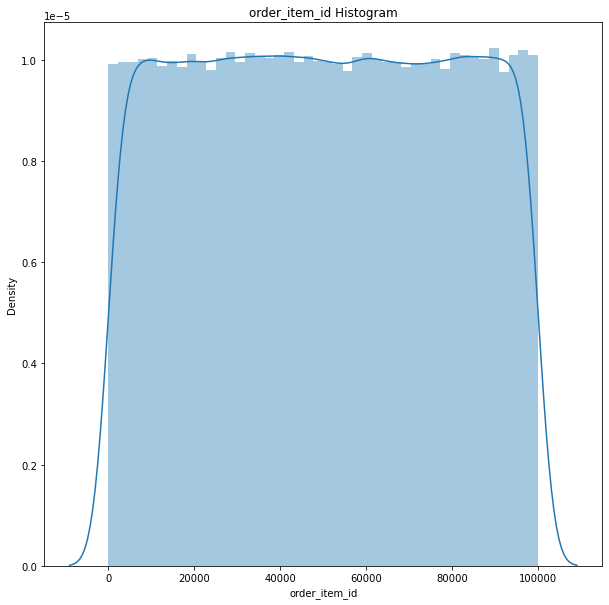

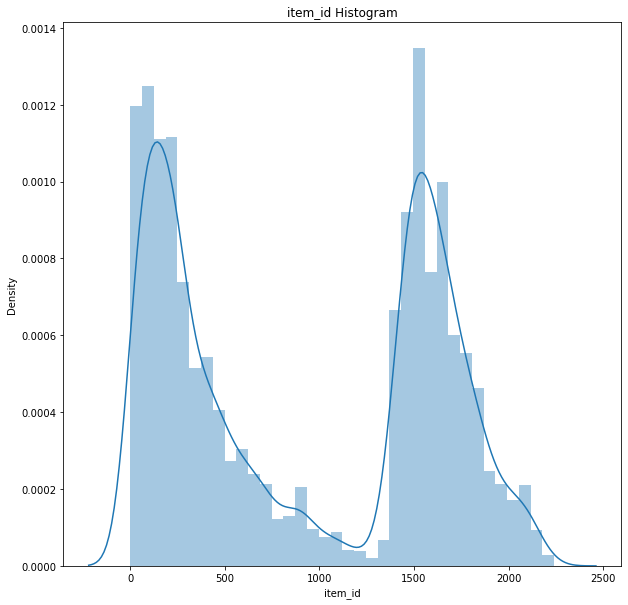

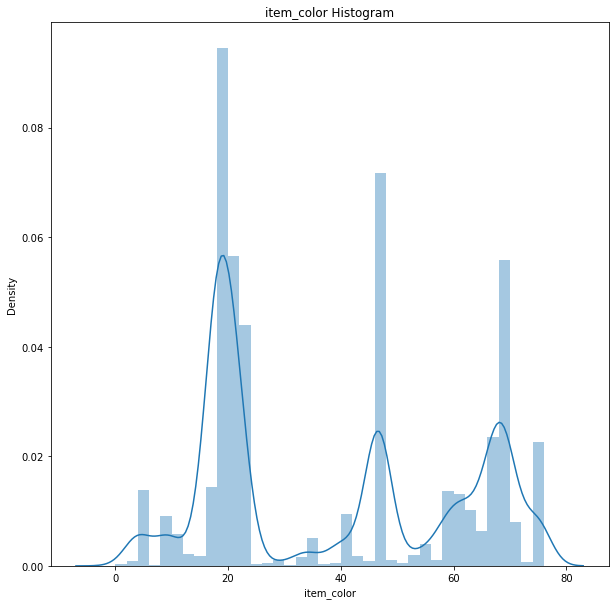

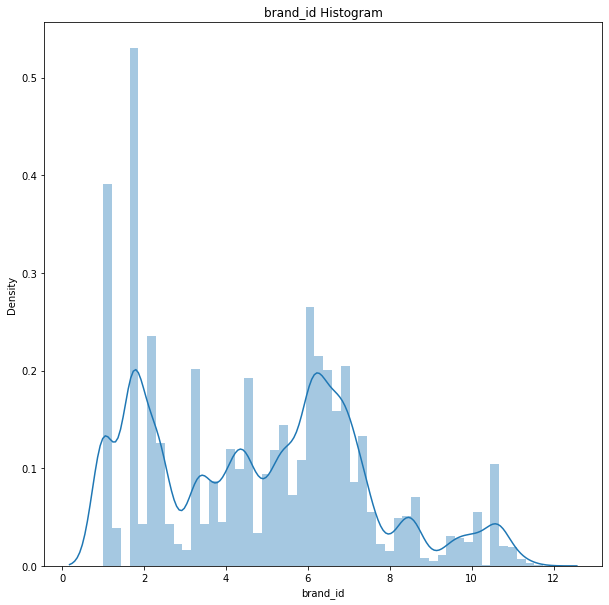

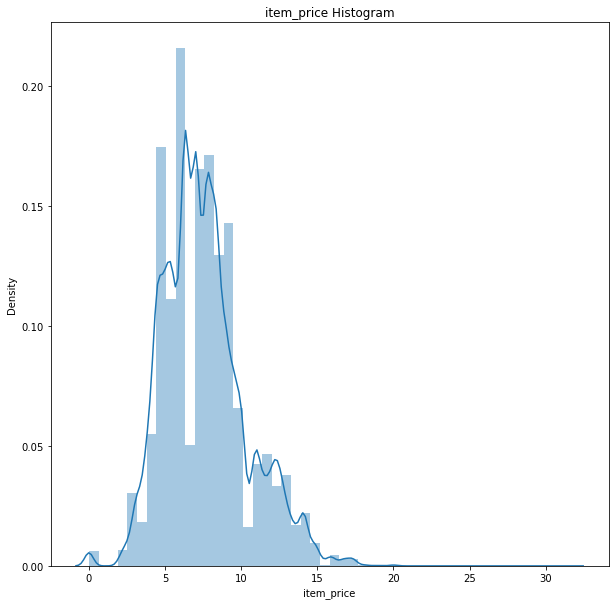

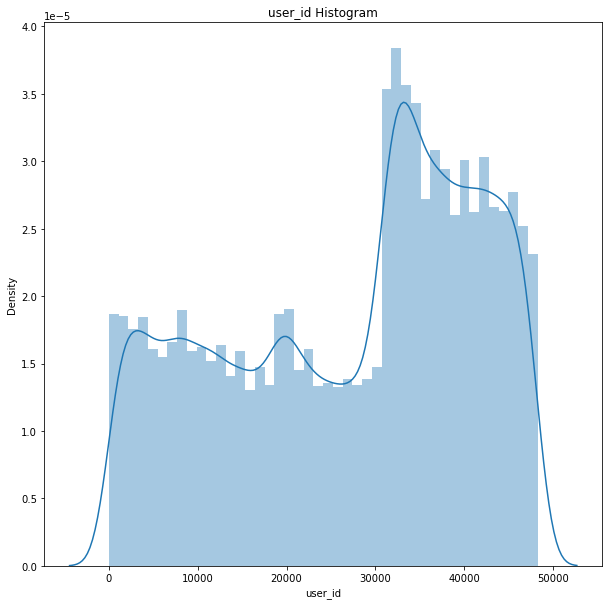

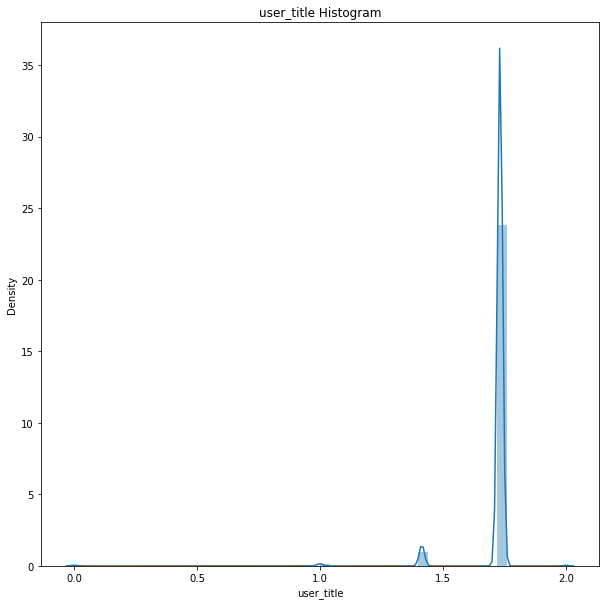

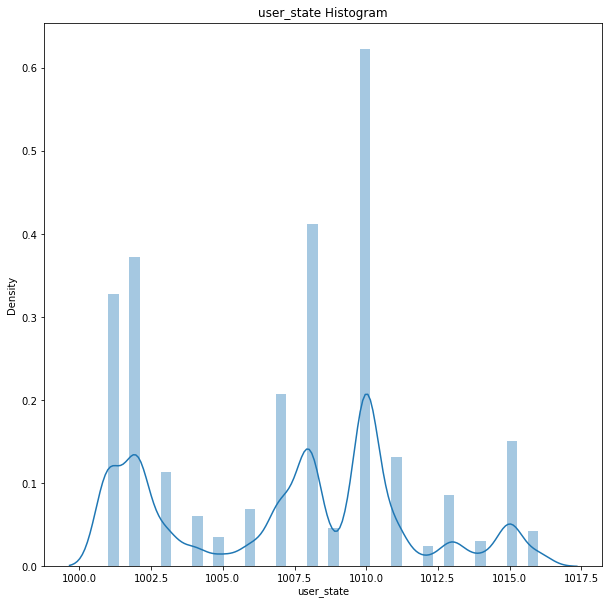

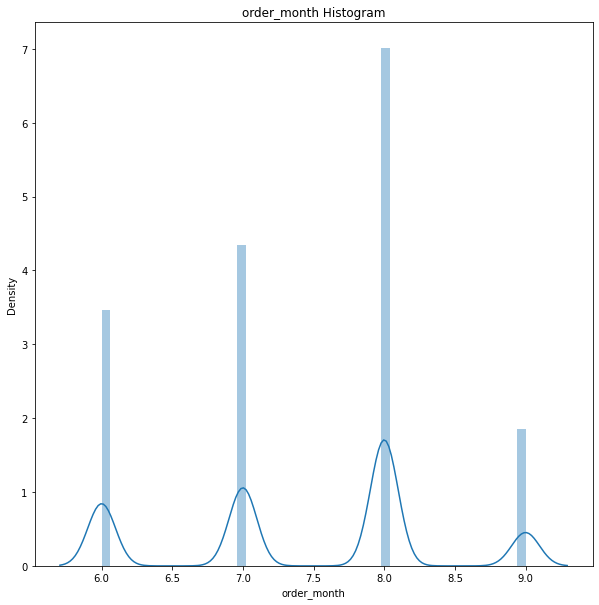

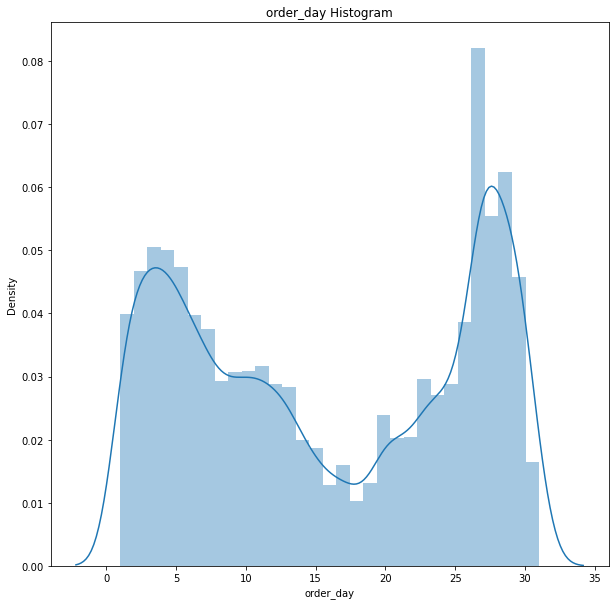

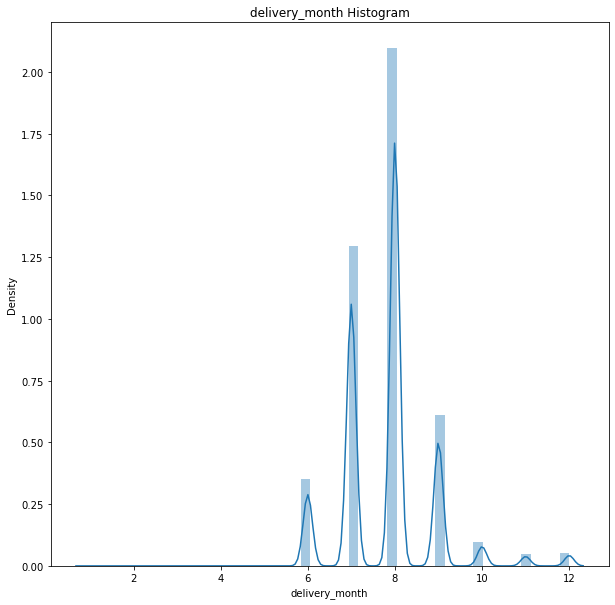

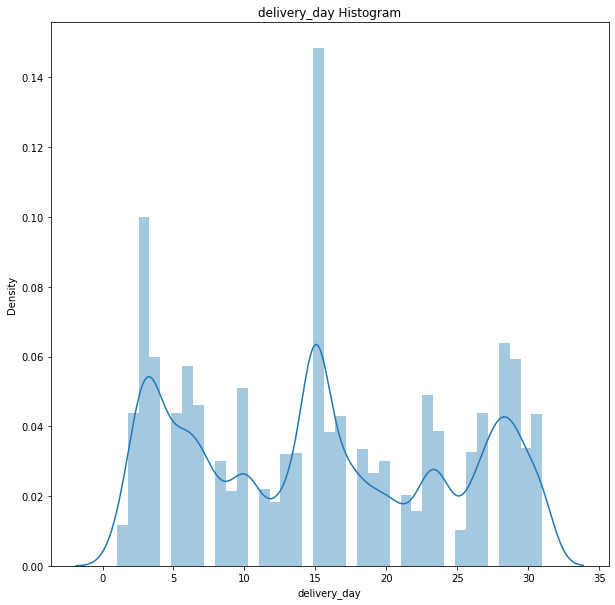

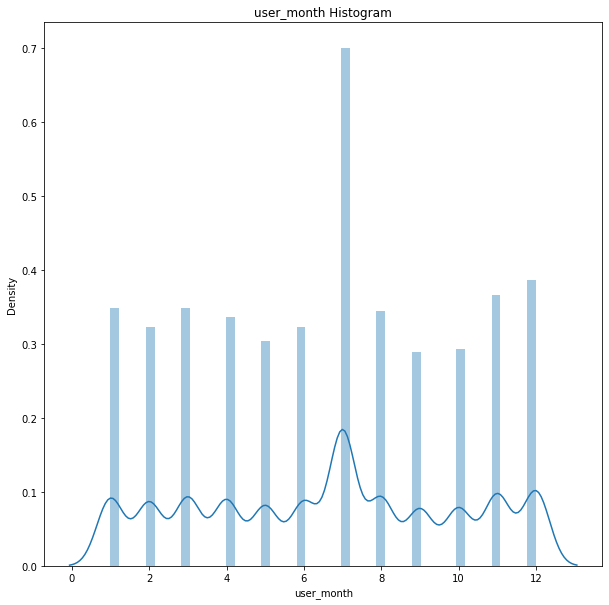

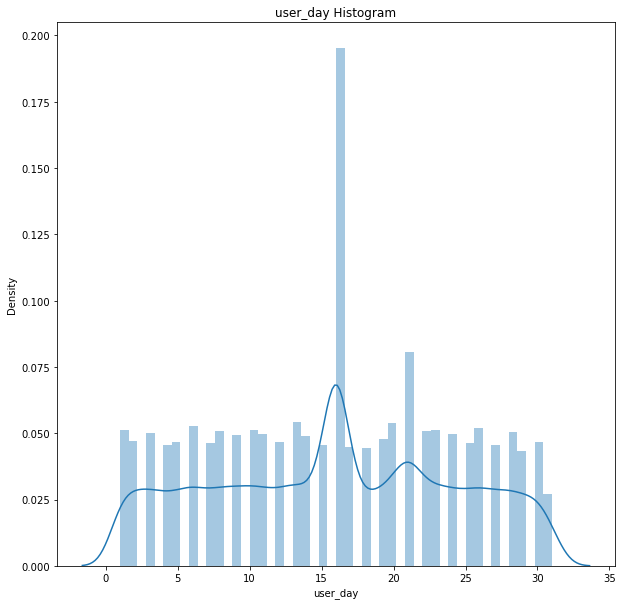

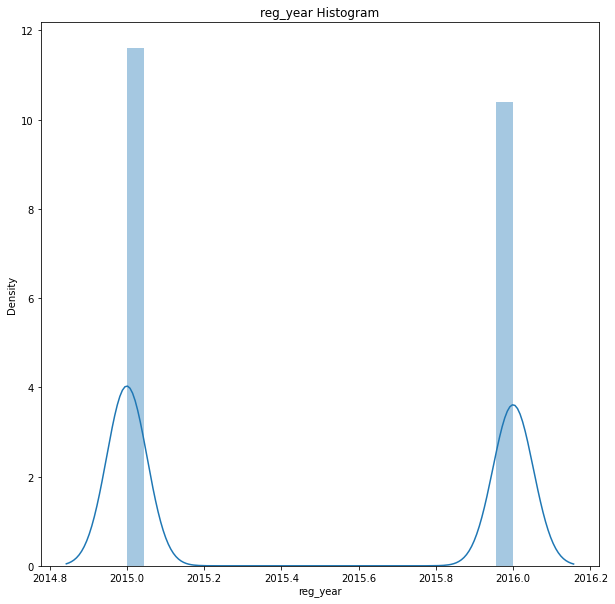

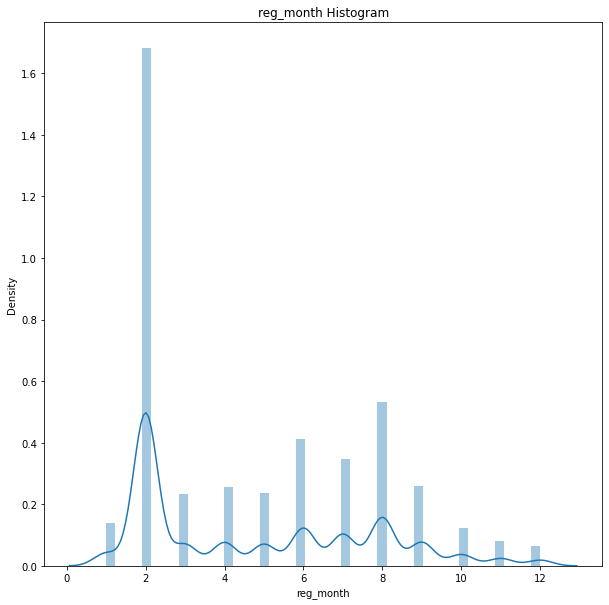

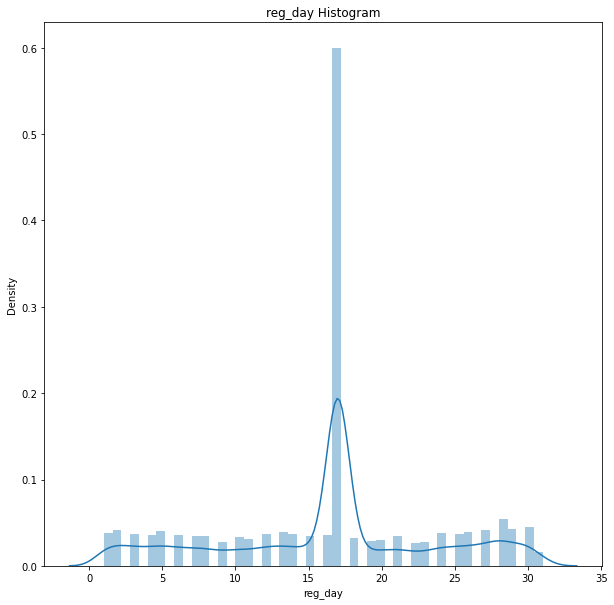

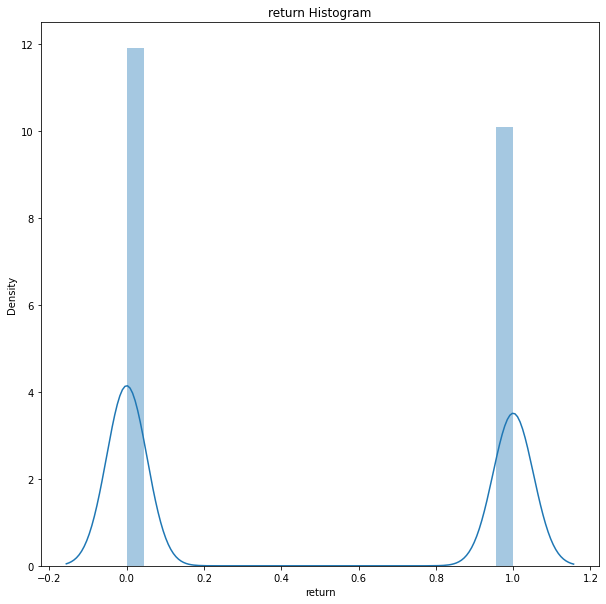

In [49]:
histogram(sqrt_trans_data)

In [50]:
def Boxplot(df):
    for col in df.columns:
        if col!='charges in INR':
            plt.figure(figsize=(10,10))
            sns.boxplot(df[col]).set_title(f'{col} Boxplot')

C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\li

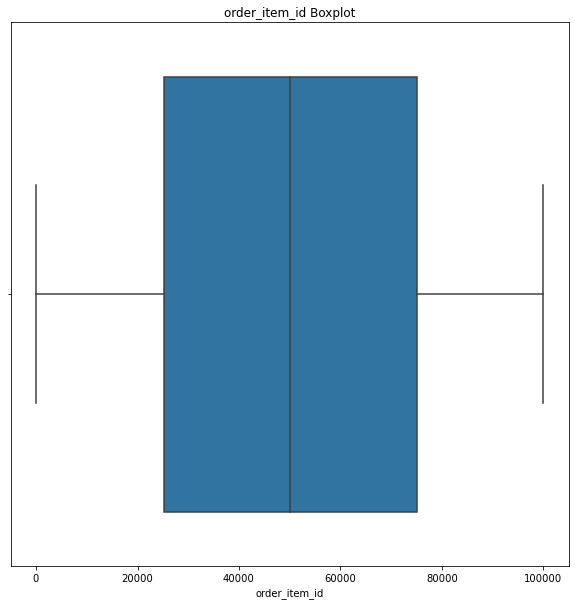

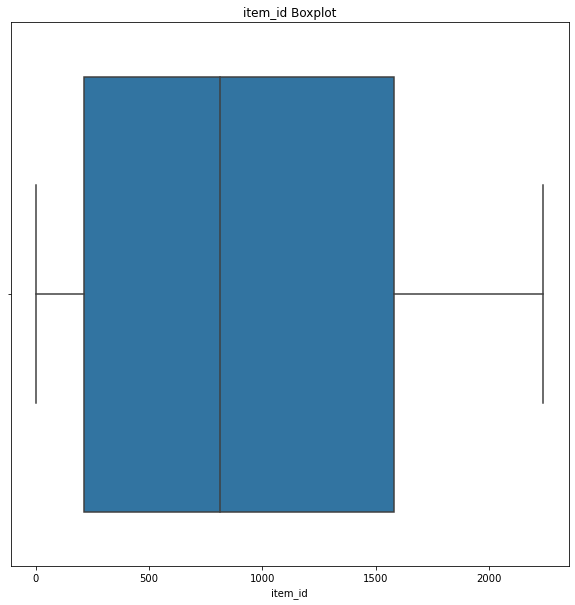

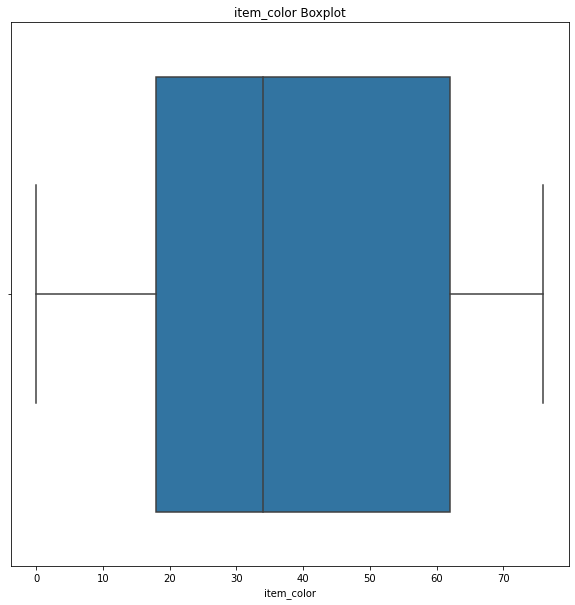

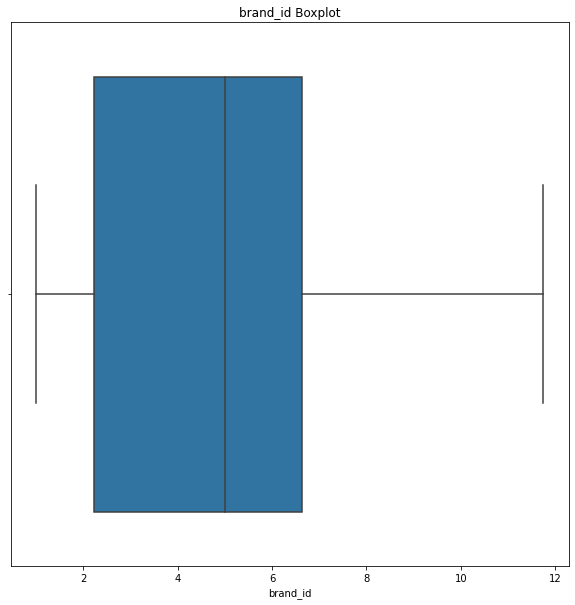

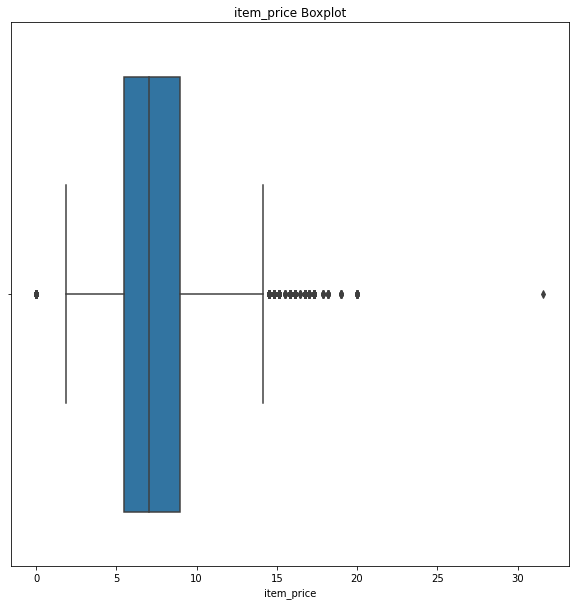

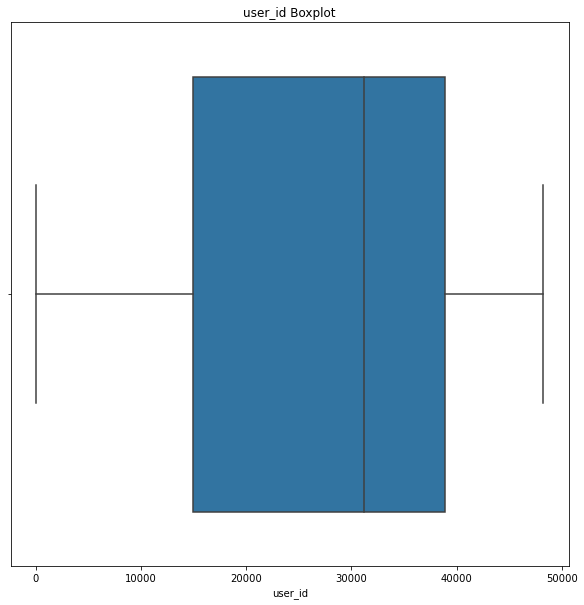

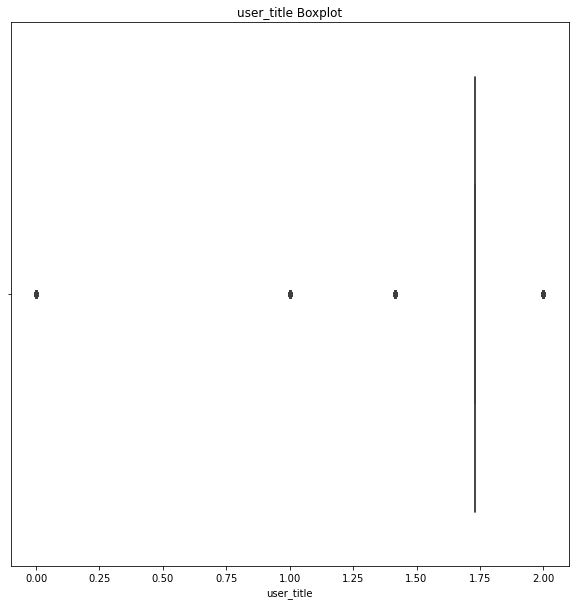

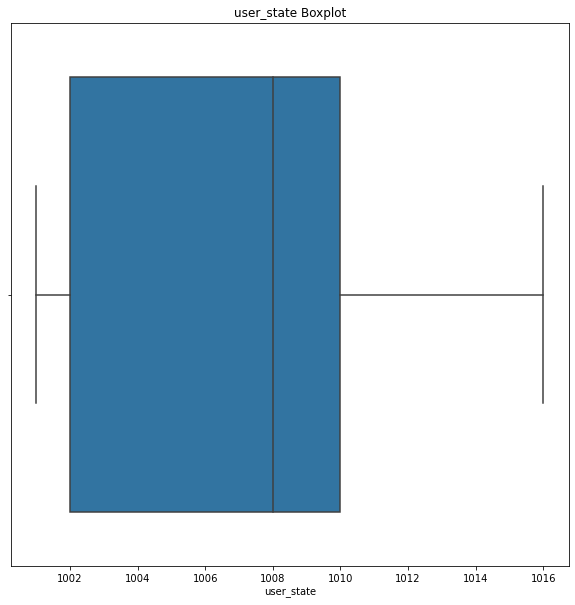

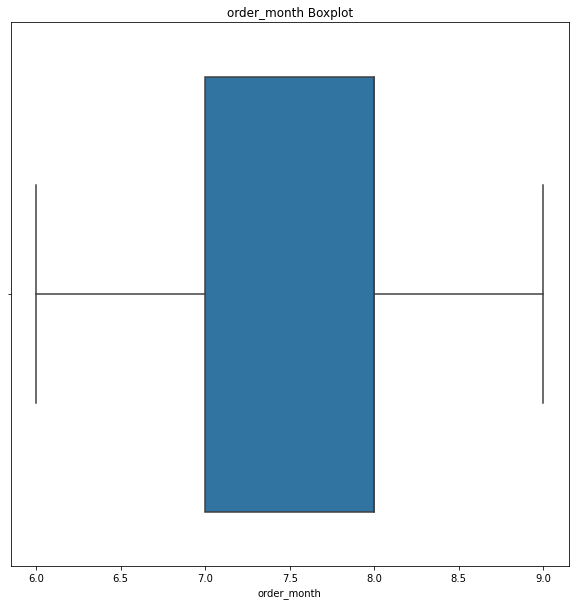

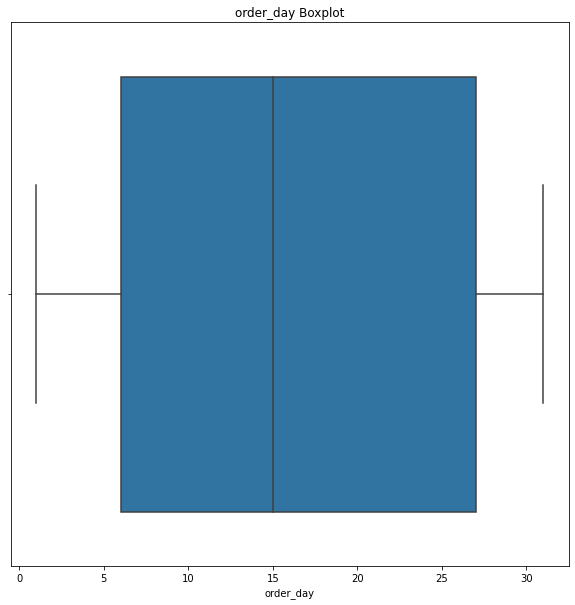

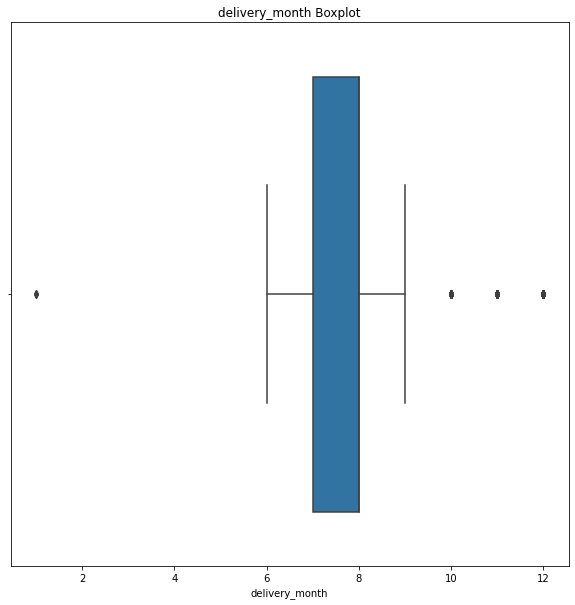

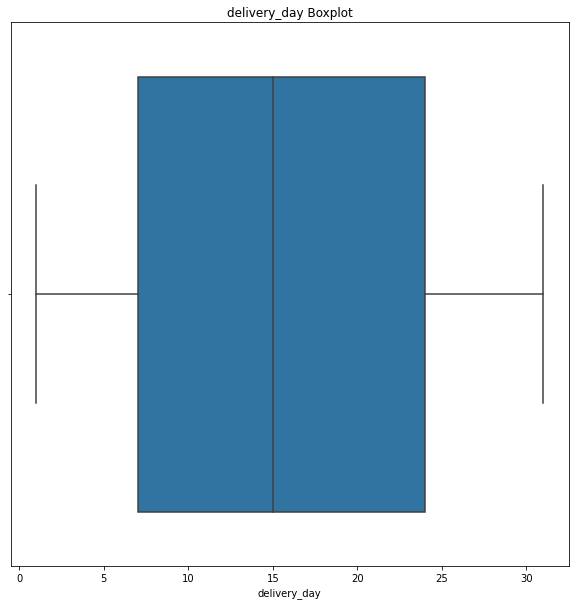

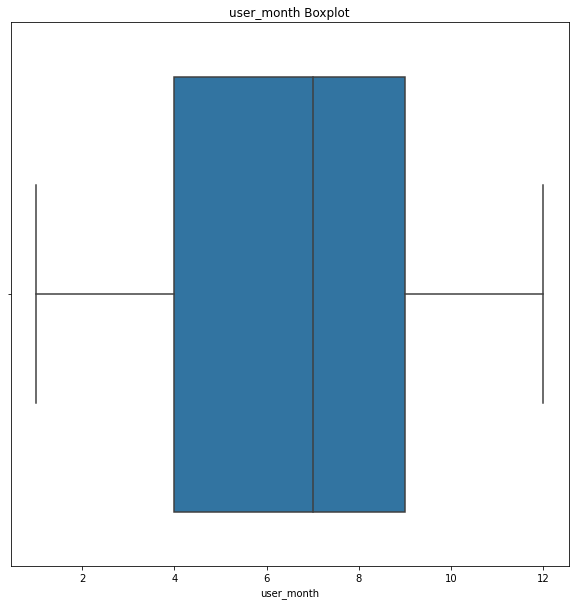

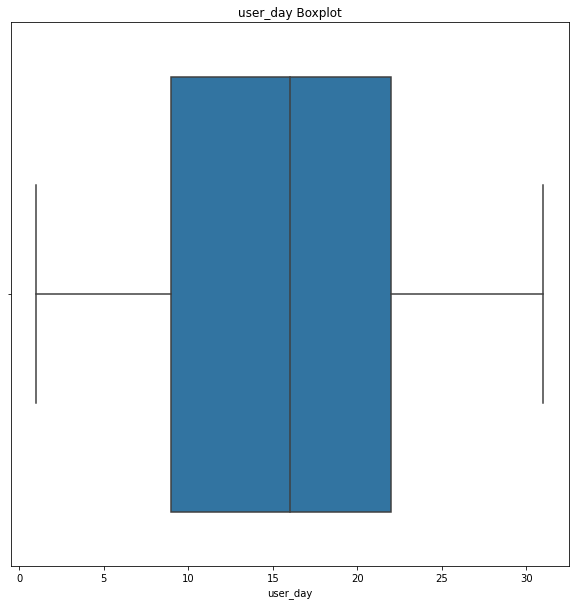

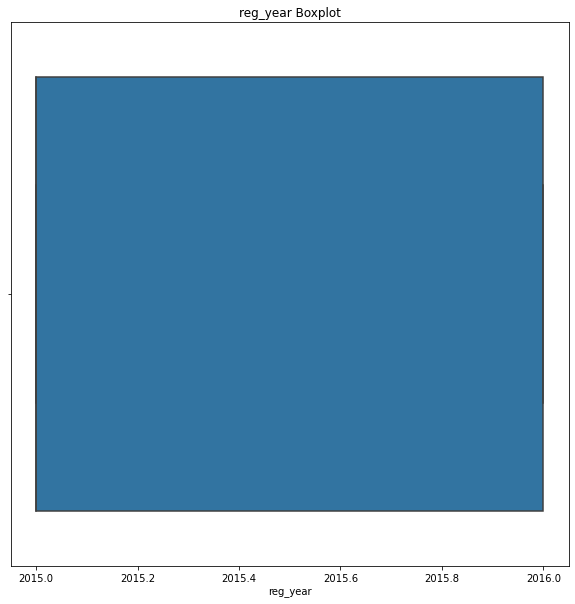

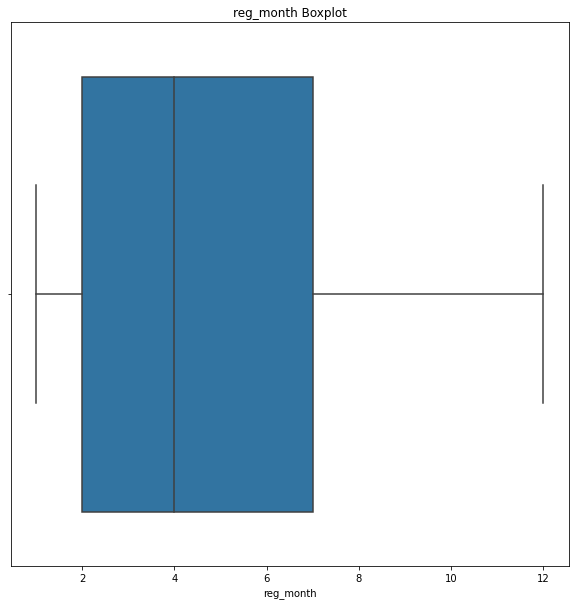

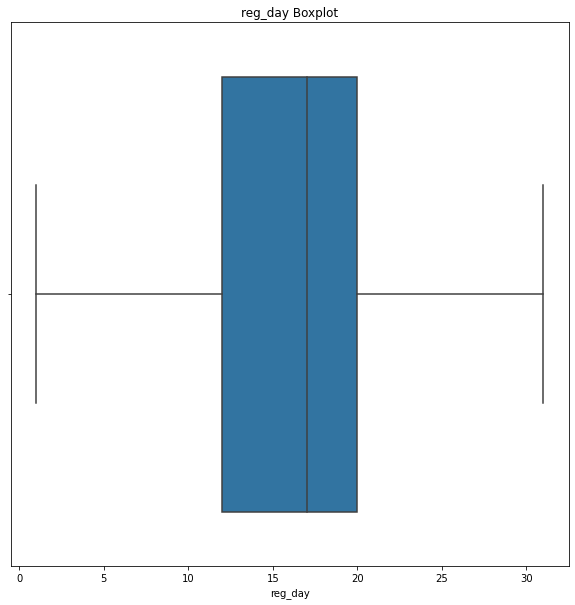

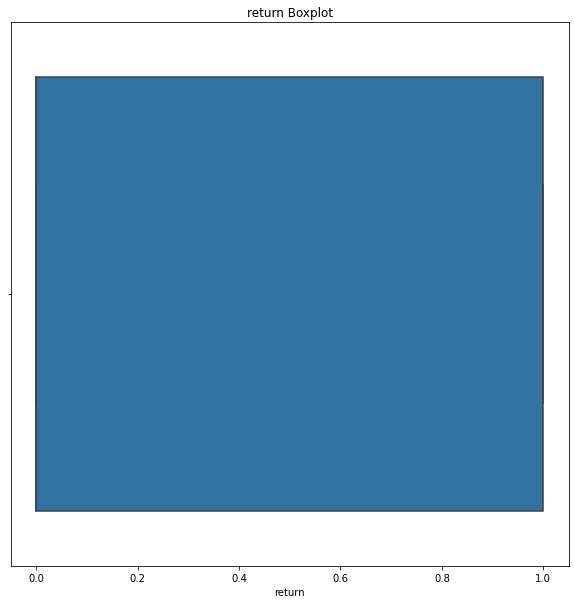

In [51]:
Boxplot(sqrt_trans_data)

In [53]:
describe(sqrt_trans_data)

,order_item_id,item_id,item_color,brand_id,item_price,user_id,user_title,user_state,order_month,order_day,delivery_month,delivery_day,user_month,user_day,reg_year,reg_month,reg_day,return
DataType,int64,int64,int32,float64,float64,int64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64
Count,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945
Min,1,1,0,1.0,0.0,9,0.0,1001,6,1,1.0,1.0,1.0,1.0,2015,1,1,0
Q1,25133.0,214.0,18.0,2.236068,5.468089,14943.0,1.732051,1002.0,7.0,6.0,7.0,7.0,4.0,9.0,2015.0,2.0,12.0,0.0
Q2,49985.0,812.0,34.0,5.0,7.063993,31189.0,1.732051,1008.0,8.0,15.0,8.0,15.0,7.0,16.0,2015.0,4.0,17.0,0.0
Mean,50056.6,924.28,38.49,4.82,7.59,27185.71,1.71,1007.27,7.44,15.91,7.81,15.43,6.58,15.85,2015.47,4.76,16.34,0.46
Q3,75118.0,1582.0,62.0,6.63325,8.93868,38931.0,1.732051,1010.0,8.0,27.0,8.0,24.0,9.0,22.0,2016.0,7.0,20.0,1.0
Max,100000,2241,76,11.74734,31.606961,48241,2.0,1016,9,31,12.0,31.0,12.0,31.0,2016,12,31,1
Std,28872.6,702.58,22.29,2.62,2.72,14063.26,0.1,4.28,0.94,10.08,1.02,9.16,3.37,8.35,0.5,2.96,7.45,0.5
Skew,0.0,0.08,0.25,0.28,0.69,-0.38,-9.26,-0.0,-0.16,0.01,0.91,0.14,-0.03,-0.03,0.11,0.53,-0.16,0.17


#### Outlier Treatment
- We are using this method to a particular column as, even after performing transformation techniques there were no changes.
- we have replaced all the outliers by mean.

In [60]:
#outlier Treatment
IQR1 = sqrt_trans_data.user_title.quantile(0.75)-sqrt_trans_data.user_title.quantile(0.25)

In [61]:
IQR1

0.0

In [62]:
lower_bridge = sqrt_trans_data['user_title'].quantile(0.25)-(IQR1*1.5)
upper_bridge = sqrt_trans_data['user_title'].quantile(0.75)+(IQR1*1.5)
print(lower_bridge,upper_bridge)

1.7320508075688772 1.7320508075688772


In [64]:
data = sqrt_trans_data.copy()

In [71]:
data['user_title'].mean()

1.714495762588458

In [75]:
data.loc[data['user_title']>=1.7320,'user_title'] = data['user_title'].mean()

In [76]:
data.loc[data['user_title']<=1.7320,'user_title'] = data['user_title'].mean()

In [77]:
describe(data)

,order_item_id,item_id,item_color,brand_id,item_price,user_id,user_title,user_state,order_month,order_day,delivery_month,delivery_day,user_month,user_day,reg_year,reg_month,reg_day,return
DataType,int64,int64,int32,float64,float64,int64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64
Count,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945
Min,1,1,0,1.0,0.0,9,1.697416,1001,6,1,1.0,1.0,1.0,1.0,2015,1,1,0
Q1,25133.0,214.0,18.0,2.236068,5.468089,14943.0,1.697416,1002.0,7.0,6.0,7.0,7.0,4.0,9.0,2015.0,2.0,12.0,0.0
Q2,49985.0,812.0,34.0,5.0,7.063993,31189.0,1.697416,1008.0,8.0,15.0,8.0,15.0,7.0,16.0,2015.0,4.0,17.0,0.0
Mean,50056.6,924.28,38.49,4.82,7.59,27185.71,1.7,1007.27,7.44,15.91,7.81,15.43,6.58,15.85,2015.47,4.76,16.34,0.46
Q3,75118.0,1582.0,62.0,6.63325,8.93868,38931.0,1.697416,1010.0,8.0,27.0,8.0,24.0,9.0,22.0,2016.0,7.0,20.0,1.0
Max,100000,2241,76,11.74734,31.606961,48241,1.697416,1016,9,31,12.0,31.0,12.0,31.0,2016,12,31,1
Std,28872.6,702.58,22.29,2.62,2.72,14063.26,0.0,4.28,0.94,10.08,1.02,9.16,3.37,8.35,0.5,2.96,7.45,0.5
Skew,0.0,0.08,0.25,0.28,0.69,-0.38,0,-0.0,-0.16,0.01,0.91,0.14,-0.03,-0.03,0.11,0.53,-0.16,0.17


#### Checking for multi-colinearity using correlation matrix

<AxesSubplot:>

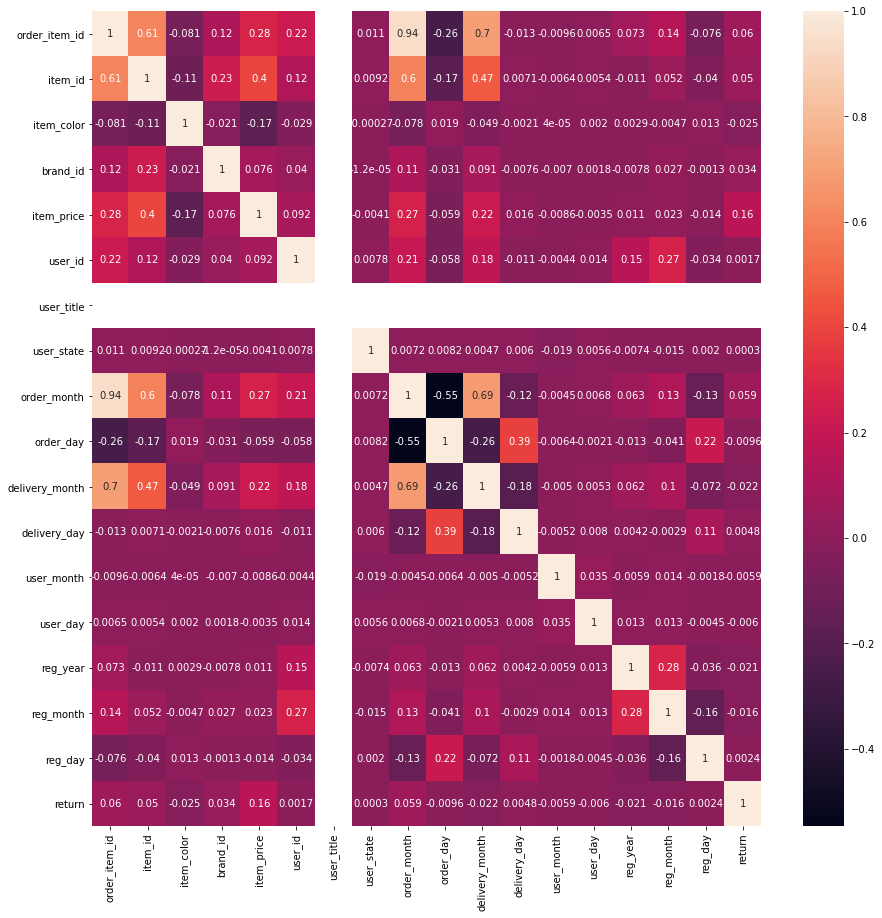

In [79]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

#### Checking for Multicolinearity using Variance inflation factor method.

In [80]:
transformed_df = data.drop('return',axis=1).copy()

In [109]:
new_data = data.copy()

In [81]:
def vif(features):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif['vif_factor'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
    vif['features']=features.columns
    
    return vif.sort_values('vif_factor')

In [83]:
vif(transformed_df)

,vif_factor,features
7,1.001147e+00,user_state
13,1.001816e+00,user_day
12,1.002487e+00,user_month
2,1.032416e+00,item_color
3,1.059105e+00,brand_id
16,1.077199e+00,reg_day
14,1.101813e+00,reg_year
5,1.130338e+00,user_id
15,1.187017e+00,reg_month
4,1.215944e+00,item_price


#### Analysis
1. we can see from the above that there is one column order_item_id which have high colinearity.

#### Checking for the Percentage of co-relation with dependent variable.

In [87]:
def corr_with_target(df,t_col):
    independent_variables = df.drop(t_col,axis=1).columns
    corr_result=[]
    for col in independent_variables:
        corr_result.append(df[t_col].corr(df[col]))
    result = pd.DataFrame([independent_variables,corr_result],index=['Independent variables','Correlation']).T
    return result.sort_values('Correlation')

In [89]:
corr_with_target(data,'return')

,Independent variables,Correlation
2,item_color,-0.024504
10,delivery_month,-0.022248
14,reg_year,-0.021383
15,reg_month,-0.016477
9,order_day,-0.00961
13,user_day,-0.006016
12,user_month,-0.0059
6,user_title,0.0
7,user_state,0.000298
5,user_id,0.001727


#### Treating Multicolinearity with Principal component analysis.

In [90]:
def Pca(x):
    
    n_com =len(x.columns)
    
    # applying standard scaler
    from sklearn.preprocessing import StandardScaler
    x= StandardScaler().fit_transform(x)
    
    #applying PCA
    from sklearn.decomposition import PCA
    
    for i in range(1,n_com):
        pca = PCA(n_components=i)
        p_comp = pca.fit_transform(x)
        evr=np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1]>0.9:
            n_components=i
            break
            
    
    print('Explained Variance Ratio after PCA is',evr)
    
    #creating a  dataframe
    col=[]
    for j in range(1,n_components+1):
        col.append('pc_'+str(j))
    
    pca_df = pd.DataFrame(p_comp,columns=col)
    return pca_df

In [91]:
transform_df_pca = Pca(data.drop('return',axis = 1))

Explained Variance Ratio after PCA is [0.22092924 0.31212619 0.40077866 0.46662091 0.53141536 0.59413888
 0.65576348 0.71558034 0.77280766 0.82435944 0.87378624 0.91461495]


In [94]:
transform_df_pca.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12
0,-2.778607,-0.060497,1.715043,-0.783949,0.793245,1.018994,0.823098,0.007388,-0.326472,0.450115,0.742659,-0.472562
1,-3.280279,0.292423,0.216676,0.073356,-0.309862,-0.973167,1.234994,-1.354820,0.610517,-1.169669,-0.553267,-0.720134
2,-2.550192,-0.455741,-0.854171,0.789637,-0.182595,-0.675125,-0.382296,-1.612872,-0.277191,-1.147460,1.395530,0.196745
3,-3.535934,0.958936,-0.333739,0.258659,2.010748,1.131369,0.247397,-0.106416,0.486389,-0.351028,-1.008364,-0.325276
4,-2.524736,0.271882,1.117220,1.904055,0.007140,0.050984,0.807017,-0.000479,0.442097,0.342382,0.378442,-1.821469


In [95]:
transform_df_pca = transform_df_pca.join(data['return'],how='left')

In [96]:
transform_df_pca.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,return
0,-2.778607,-0.060497,1.715043,-0.783949,0.793245,1.018994,0.823098,0.007388,-0.326472,0.450115,0.742659,-0.472562,0
1,-3.280279,0.292423,0.216676,0.073356,-0.309862,-0.973167,1.234994,-1.354820,0.610517,-1.169669,-0.553267,-0.720134,1
2,-2.550192,-0.455741,-0.854171,0.789637,-0.182595,-0.675125,-0.382296,-1.612872,-0.277191,-1.147460,1.395530,0.196745,0
3,-3.535934,0.958936,-0.333739,0.258659,2.010748,1.131369,0.247397,-0.106416,0.486389,-0.351028,-1.008364,-0.325276,0
4,-2.524736,0.271882,1.117220,1.904055,0.007140,0.050984,0.807017,-0.000479,0.442097,0.342382,0.378442,-1.821469,1


# Model Building

In [110]:
def train_and_test_split(df,t_col,testsize=0.3):
    x = df.drop(t_col,axis=1)
    y = df[t_col]
    return train_test_split(x,y,test_size=testsize,random_state=0)

In [111]:
# Model Building Function

def build_model(model_name,estimator,df,t_col):
    x_train,x_test,y_train,y_test = train_and_test_split(df,t_col)
    estimator.fit(x_train,y_train)
    y_pred = estimator.predict(x_test)
    Accuracy= accuracy_score(y_test,y_pred)
    temp = [model_name,Accuracy]
    return temp

In [104]:
build_model('Logistic Regression',LogisticRegression(),transform_df_pca,'return')

['Logistic Regression', 0.5673365577051368]

In [112]:
build_model('Logistic Regression',LogisticRegression(),data,'return')

['Logistic Regression', 0.541319212808539]

In [105]:
def multiple_models(df,t_col):
    col_names = ['Model_Name','Accuracy_Score']
    result = pd.DataFrame(columns=col_names)
    result.loc[len(result)] = build_model('LogisticRegression',LogisticRegression(),df,t_col)
    result.loc[len(result)] = build_model('SVC',SVC(),df,t_col)
    result.loc[len(result)] = build_model('Decision Tree',DecisionTreeClassifier(),df,t_col)
    result.loc[len(result)] = build_model('XG_boost',XGBClassifier(),df,t_col)
    result.loc[len(result)] = build_model('ADA_boost',AdaBoostClassifier(),df,t_col)
    result.loc[len(result)] = build_model('Random_forest',RandomForestClassifier(),df,t_col)
    result.loc[len(result)] = build_model('Gradient_boosting',GradientBoostingClassifier(),df,t_col)
    result.loc[len(result)] = build_model('KNN_Regressor',KNeighborsClassifier(),df,t_col)
    return result

In [107]:
multiple_models(transform_df_pca,'return')

C:\Users\ashish\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:17:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model_Name,Accuracy_Score
0,LogisticRegression,0.567337
1,SVC,0.592520
2,Decision Tree,0.566503
3,XG_boost,0.597523
4,ADA_boost,0.577343
5,Random_forest,0.615410
6,Gradient_boosting,0.587016
7,KNN_Regressor,0.581763


In [113]:
multiple_models(data,'return')

C:\Users\ashish\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model_Name,Accuracy_Score
0,LogisticRegression,0.541319
1,SVC,0.541569
2,Decision Tree,0.605654
3,XG_boost,0.650350
4,ADA_boost,0.620372
5,Random_forest,0.650058
6,Gradient_boosting,0.630212
7,KNN_Regressor,0.577135


In [114]:
# Cross Validation

def k_fold_cv(x,y,fold=10):
    
    score_lr = cross_val_score(LogisticRegression(),x,y,cv=fold)
    score_svc = cross_val_score(SVC(),x,y,cv=fold)
    score_DT = cross_val_score(DecisionTreeClassifier(),x,y,cv=fold)
    score_Xgboost = cross_val_score(XGBClassifier(),x,y,cv=fold)
    score_Ada = cross_val_score(AdaBoostClassifier(),x,y,cv=fold)
    score_RM = cross_val_score(RandomForestClassifier(),x,y,cv=fold)
    score_GB = cross_val_score(GradientBoostingClassifier(),x,y,cv=fold)
    score_KNN = cross_val_score(KNeighborsClassifier(),x,y,cv=fold)
    
    
    model_names=['LogisticRegression','SVC','DecisionTree','XGBoost','ADA','RandomForest','Gradient_boost','K_Neighbours']
    score = [score_lr,score_svc,score_DT,score_Xgboost,score_Ada,score_RM,score_GB,score_KNN]
    
    result = []
    
    for i in range(0,len(model_names)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_std]
        result.append(temp)
    
    
    Kfold_df = pd.DataFrame(result,columns=['model_names','score_mean','score_std'])
    return Kfold_df

# Cross Validation Using PCA

In [115]:
k_fold_cv(transform_df_pca.drop('return',axis=1),transform_df_pca['return'])

C:\Users\ashish\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model_names,score_mean,score_std
0,LogisticRegression,0.566652,0.005668
1,SVC,0.590381,0.005149
2,DecisionTree,0.563275,0.006815
3,XGBoost,0.594371,0.007212
4,ADA,0.575783,0.006020
5,RandomForest,0.616824,0.006977
6,Gradient_boost,0.583126,0.004906
7,K_Neighbours,0.587104,0.007526


# Cross Validation using normal data without multicolinearity treatment.

In [ ]:
k_fold_cv(data.drop('return',axis=1),data['return'])

C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[14:42:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model_names,score_mean,score_std
0,LogisticRegression,0.546050,0.017188
1,SVC,0.542185,0.004363
2,DecisionTree,0.606079,0.007000
3,XGBoost,0.649209,0.004854
4,ADA,0.614960,0.007283
5,RandomForest,0.651973,0.008464
6,Gradient_boost,0.626230,0.007458
7,K_Neighbours,0.579186,0.007391


### The next step would be to hyperparameter tune the model and again check the cross validation, Due to local system computational power, further could not be continued.